In [1]:
import pandas as pd
import os

### Merge the 12 months of sales data into single CSV file

In [2]:
files= [file for file in os.listdir('./Sales_Data')]

all_months_data=pd.DataFrame()

for file in files:
    df=pd.read_csv('./Sales_Data/'+file)
    all_months_data=pd.concat([all_months_data,df])


In [3]:
all_months_data.to_csv("Sales_Data_2019.csv",index=False)

In [4]:
sales= pd.read_csv('Sales_Data_2019.csv')

In [5]:
sales.shape

(186850, 6)

In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [7]:
sales.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [8]:
sales.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

### Order ID

In [9]:
sales.rename(columns={'Order ID':'order_id'},inplace=True)

In [10]:
sales.order_id.value_counts(dropna=False)

NaN         545
Order ID    355
160873        5
289117        4
165665        4
           ... 
289035        1
182130        1
276449        1
297154        1
234877        1
Name: order_id, Length: 178439, dtype: int64

In [11]:
import numpy as np

In [12]:
sales['order_id'].replace(to_replace='Order ID',value=np.nan,inplace=True)

In [13]:
sales.order_id.value_counts(dropna=False)

NaN       900
160873      5
289117      4
235798      4
295681      4
         ... 
289035      1
182130      1
276449      1
297154      1
234877      1
Name: order_id, Length: 178438, dtype: int64

In [14]:
sales.iloc[:,0].nunique()

178437

In [15]:
sales.iloc[:,0].isnull().sum()

900

In [16]:
sales.dropna(axis=0,inplace=True)

In [17]:
sales.iloc[:,0].isnull().sum()

0

In [18]:
print(sales['order_id'].dtype)

object


In [19]:
sales['order_id'] = sales["order_id"].astype('int')

In [20]:
print(sales['order_id'].dtype)

int32


In [21]:
sales[sales['order_id'] == 193511]

,order_id,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
17767,193511,Google Phone,1,600,4/21/2019 11:14,"821 Elm St, Austin, TX 73301"
17768,193511,USB-C Charging Cable,2,11.95,4/21/2019 11:14,"821 Elm St, Austin, TX 73301"
17769,193511,Bose SoundSport Headphones,1,99.99,4/21/2019 11:14,"821 Elm St, Austin, TX 73301"
17770,193511,Wired Headphones,1,11.99,4/21/2019 11:14,"821 Elm St, Austin, TX 73301"


In [22]:
sales.head(1)

,order_id,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"


### Product

In [23]:
sales.Product.value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

In [24]:
sales.iloc[:,1].nunique()

19

In [25]:
print(sales['Product'].dtype)

object


In [26]:
sales.iloc[:,1].isnull().any()

False

In [27]:
sales[sales['Product']=='LG Dryer'].shape

(646, 6)

In [28]:
sales.head(1)

,order_id,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"


### Quantity Ordered

In [29]:
sales.rename(columns={'Quantity Ordered':'quantity_ordered'},inplace=True)

In [30]:
sales.quantity_ordered.value_counts()

1    168552
2     13324
3      2920
4       806
5       236
6        80
7        24
8         5
9         3
Name: quantity_ordered, dtype: int64

In [31]:
sales.iloc[:,2].nunique()

9

In [32]:
sales.iloc[:,2].isnull().sum()

0

In [33]:
print(sales['quantity_ordered'].dtype)

object


In [34]:
sales['quantity_ordered'] =sales['quantity_ordered'].astype('int')

In [35]:
print(sales['quantity_ordered'].dtype)

int32


In [36]:
sales[sales['quantity_ordered'] == 9]

,order_id,Product,quantity_ordered,Price Each,Order Date,Purchase Address
81010,226483,AAA Batteries (4-pack),9,2.99,07/20/19 23:28,"867 Sunset St, San Francisco, CA 94016"
81646,227096,AAA Batteries (4-pack),9,2.99,07/29/19 09:50,"60 10th St, San Francisco, CA 94016"
92877,211097,AAA Batteries (4-pack),9,2.99,06/23/19 08:29,"338 Hickory St, Los Angeles, CA 90001"


In [37]:
sales.head(1)

,order_id,Product,quantity_ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"


### Price Each

In [38]:
sales.rename(columns={"Price Each":'price_each'},inplace=True)

In [39]:
sales.price_each.value_counts(dropna=False)

11.95     21903
14.95     21658
2.99      20641
3.84      20577
11.99     18882
150       15450
99.99     13325
149.99     7507
700        6804
389.99     6230
379.99     6181
600        5628
300        4780
1700       4702
999.99     4128
109.99     4101
400        2056
600.0      1209
150.0        99
700.0        38
1700.0       22
300.0        20
400.0         9
Name: price_each, dtype: int64

In [40]:
sales.iloc[:,3].nunique()

23

In [41]:
print(sales['price_each'].dtype)

object


In [42]:
sales['price_each'] =sales['price_each'].astype('float')

In [43]:
print(sales['price_each'].dtype)

float64


In [44]:
sales.iloc[:,3].isnull().sum()

0

In [45]:
sales[sales['price_each']==400]

,order_id,Product,quantity_ordered,price_each,Order Date,Purchase Address
82,176635,Vareebadd Phone,1,400.0,4/26/2019 9:55,"85 North St, San Francisco, CA 94016"
256,176801,Vareebadd Phone,1,400.0,4/28/2019 18:52,"125 North St, San Francisco, CA 94016"
510,177046,Vareebadd Phone,1,400.0,4/29/2019 13:02,"406 12th St, Los Angeles, CA 90001"
562,177097,Vareebadd Phone,1,400.0,4/21/2019 18:04,"35 Hickory St, Los Angeles, CA 90001"
587,177119,Vareebadd Phone,1,400.0,4/6/2019 20:13,"617 Highland St, Seattle, WA 98101"
...,...,...,...,...,...,...
186311,258848,Vareebadd Phone,1,400.0,09/13/19 18:59,"340 South St, Portland, OR 97035"
186413,258945,Vareebadd Phone,1,400.0,09/29/19 12:23,"80 Main St, Seattle, WA 98101"
186684,259204,Vareebadd Phone,1,400.0,09/17/19 18:06,"850 Meadow St, Boston, MA 02215"
186702,259220,Vareebadd Phone,1,400.0,09/21/19 20:31,"815 Jefferson St, San Francisco, CA 94016"


In [46]:
sales.head(1)

,order_id,Product,quantity_ordered,price_each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"


### Order Date

In [47]:
sales.rename(columns={'Order Date':'order_date'},inplace=True)

In [48]:
sales.order_date.value_counts()

12/15/19 20:16    8
10/30/19 21:28    7
12/11/19 13:24    7
4/2/2019 13:24    7
12/22/19 11:12    6
                 ..
05/05/19 12:02    1
02/09/19 20:36    1
08/09/19 01:01    1
02/09/19 09:35    1
03/10/19 16:35    1
Name: order_date, Length: 142395, dtype: int64

In [49]:
sales.order_date.nunique()

142395

In [50]:
print(sales['order_date'].dtype)

object


In [51]:
sales['order_date'] = pd.to_datetime(sales['order_date'])

In [52]:
print(sales['order_date'].dtype)

datetime64[ns]


In [53]:
sales.iloc[:,4].isnull().sum()

0

In [54]:
sales[sales['order_date']=='2019-04-19 08:46:00']

,order_id,Product,quantity_ordered,price_each,order_date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
4475,180841,Wired Headphones,1,11.99,2019-04-19 08:46:00,"812 Main St, Seattle, WA 98101"


In [55]:
sales.head(1)

,order_id,Product,quantity_ordered,price_each,order_date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"


### Purchase Address

In [56]:
sales.rename(columns={'Purchase Address':'purchase_address'},inplace=True)

In [57]:
sales.purchase_address.value_counts()

193 Forest St, San Francisco, CA 94016        9
223 Elm St, Los Angeles, CA 90001             8
279 Sunset St, San Francisco, CA 94016        8
197 Center St, San Francisco, CA 94016        7
292 Washington St, San Francisco, CA 94016    7
                                             ..
309 Lakeview St, San Francisco, CA 94016      1
271 Chestnut St, Boston, MA 02215             1
981 Spruce St, Seattle, WA 98101              1
581 Pine St, Portland, OR 97035               1
761 River St, Atlanta, GA 30301               1
Name: purchase_address, Length: 140787, dtype: int64

In [58]:
print(sales['purchase_address'].dtype)

object


In [59]:
sales.iloc[:,5].isnull().sum()

0

In [60]:
sales.iloc[:,5].nunique()

140787

In [61]:
sales[sales['purchase_address']=='930 4th St, Seattle, WA 98101']

,order_id,Product,quantity_ordered,price_each,order_date,purchase_address
16728,192522,USB-C Charging Cable,1,11.95,2019-04-22 06:41:00,"930 4th St, Seattle, WA 98101"


In [62]:
sales.head(1)

,order_id,Product,quantity_ordered,price_each,order_date,purchase_address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"


### Duplicate Values

In [63]:
sales.shape

(185950, 6)

In [64]:
sales[sales.duplicated(keep=False)]

,order_id,Product,quantity_ordered,price_each,order_date,purchase_address
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215"
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215"
1301,177795,Apple Airpods Headphones,1,150.00,2019-04-27 19:45:00,"740 14th St, Seattle, WA 98101"
1302,177795,Apple Airpods Headphones,1,150.00,2019-04-27 19:45:00,"740 14th St, Seattle, WA 98101"
1682,178158,USB-C Charging Cable,1,11.95,2019-04-28 21:13:00,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186508,259035,27in FHD Monitor,1,149.99,2019-09-29 13:52:00,"327 Lake St, San Francisco, CA 94016"
186781,259296,Apple Airpods Headphones,1,150.00,2019-09-28 16:48:00,"894 6th St, Dallas, TX 75001"
186782,259296,Apple Airpods Headphones,1,150.00,2019-09-28 16:48:00,"894 6th St, Dallas, TX 75001"
186784,259297,Lightning Charging Cable,1,14.95,2019-09-15 18:54:00,"138 Main St, Boston, MA 02215"


In [65]:
sales.drop_duplicates(keep='first',inplace=True)

In [66]:
sales.shape

(185686, 6)

In [67]:
sales[sales.duplicated(keep=False)]

,order_id,Product,quantity_ordered,price_each,order_date,purchase_address


In [68]:
sales.head(1)

,order_id,Product,quantity_ordered,price_each,order_date,purchase_address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"


### Extract Year from order_date

In [69]:
sales['Month'] = sales['order_date'].dt.month

In [70]:
sales

,order_id,Product,quantity_ordered,price_each,order_date,purchase_address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9


In [71]:
sales[sales['Month']==9]

,order_id,Product,quantity_ordered,price_each,order_date,purchase_address,Month
20634,238834,Apple Airpods Headphones,1,150.00,2019-09-01 04:13:00,"761 Forest St, San Francisco, CA 94016",9
21114,239285,34in Ultrawide Monitor,1,379.99,2019-09-01 01:09:00,"373 1st St, San Francisco, CA 94016",9
22507,240636,Lightning Charging Cable,1,14.95,2019-09-01 02:07:00,"63 1st St, Seattle, WA 98101",9
22952,241054,AAA Batteries (4-pack),1,2.99,2019-09-01 00:25:00,"175 South St, San Francisco, CA 94016",9
24297,242343,ThinkPad Laptop,1,999.99,2019-09-01 02:44:00,"510 Park St, Boston, MA 02215",9
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9


### Extract City from purchase_address

In [72]:
def get_city(address):
    return address.split(',')[1]

sales['City']=sales['purchase_address'].apply(lambda x:get_city(x))

In [73]:
sales

,order_id,Product,quantity_ordered,price_each,order_date,purchase_address,Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,San Francisco
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,San Francisco


In [74]:
sales[sales['City'] == 'Boston']

,order_id,Product,quantity_ordered,price_each,order_date,purchase_address,Month,City


In [75]:
sales['City']= sales['City'].str.strip()

In [76]:
sales[sales['City'] == 'Boston']

,order_id,Product,quantity_ordered,price_each,order_date,purchase_address,Month,City
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston
10,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",4,Boston
23,176578,Apple Airpods Headphones,1,150.00,2019-04-09 23:35:00,"513 Church St, Boston, MA 02215",4,Boston
26,176581,iPhone,1,700.00,2019-04-09 21:38:00,"84 Jackson St, Boston, MA 02215",4,Boston
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,Boston
...,...,...,...,...,...,...,...,...
186827,259336,AAA Batteries (4-pack),3,2.99,2019-09-25 00:13:00,"753 14th St, Boston, MA 02215",9,Boston
186828,259337,USB-C Charging Cable,1,11.95,2019-09-19 17:34:00,"495 Park St, Boston, MA 02215",9,Boston
186829,259338,AAA Batteries (4-pack),2,2.99,2019-09-02 21:29:00,"666 Lakeview St, Boston, MA 02215",9,Boston
186833,259342,AA Batteries (4-pack),1,3.84,2019-09-07 20:09:00,"579 South St, Boston, MA 02215",9,Boston


In [77]:
sales.shape

(185686, 8)

In [78]:
sales.count()

order_id            185686
Product             185686
quantity_ordered    185686
price_each          185686
order_date          185686
purchase_address    185686
Month               185686
City                185686
dtype: int64

In [79]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          185686 non-null  int32         
 1   Product           185686 non-null  object        
 2   quantity_ordered  185686 non-null  int32         
 3   price_each        185686 non-null  float64       
 4   order_date        185686 non-null  datetime64[ns]
 5   purchase_address  185686 non-null  object        
 6   Month             185686 non-null  int64         
 7   City              185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(3)
memory usage: 11.3+ MB


In [80]:
sales.describe()

,order_id,quantity_ordered,price_each,Month
count,185686.000000,185686.000000,185686.000000,185686.000000
mean,230411.376227,1.124544,184.519255,7.058653
std,51511.717183,0.443069,332.843838,3.502932
min,141234.000000,1.000000,2.990000,1.000000
25%,185833.250000,1.000000,11.950000,4.000000
50%,230354.500000,1.000000,14.950000,7.000000
75%,275028.750000,1.000000,150.000000,10.000000
max,319670.000000,9.000000,1700.000000,12.000000


In [81]:
sales.head(1)

,order_id,Product,quantity_ordered,price_each,order_date,purchase_address,Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas


### Data Analytics

In [82]:
Month=sales.groupby('Product').quantity_ordered.count()

In [83]:
Month

Product
20in Monitor                   4098
27in 4K Gaming Monitor         6225
27in FHD Monitor               7498
34in Ultrawide Monitor         6174
AA Batteries (4-pack)         20558
AAA Batteries (4-pack)        20612
Apple Airpods Headphones      15525
Bose SoundSport Headphones    13298
Flatscreen TV                  4794
Google Phone                   5522
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      21610
Macbook Pro Laptop             4721
ThinkPad Laptop                4126
USB-C Charging Cable          21859
Vareebadd Phone                2065
Wired Headphones              18849
iPhone                         6840
Name: quantity_ordered, dtype: int64

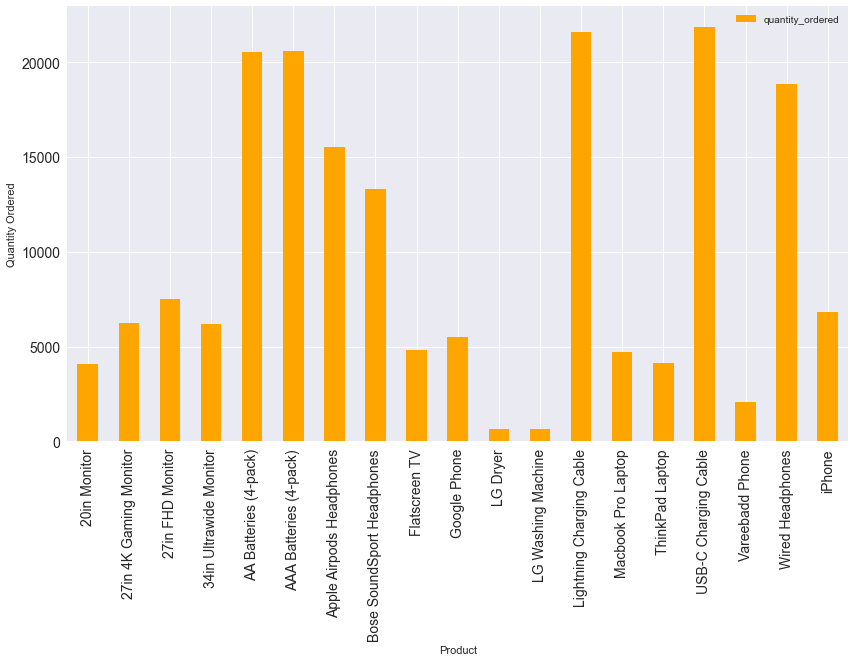

In [84]:
%matplotlib  inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
Month.plot(kind='bar',figsize=(14,8),fontsize=14,color='Orange')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.legend()
plt.show()

In [85]:
sales.head(1)

,order_id,Product,quantity_ordered,price_each,order_date,purchase_address,Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas


In [86]:
City= sales.groupby('City').quantity_ordered.count()

In [87]:
City

City
Atlanta          14863
Austin            9890
Boston           19901
Dallas           14797
Los Angeles      29564
New York City    24847
Portland         12449
San Francisco    44662
Seattle          14713
Name: quantity_ordered, dtype: int64

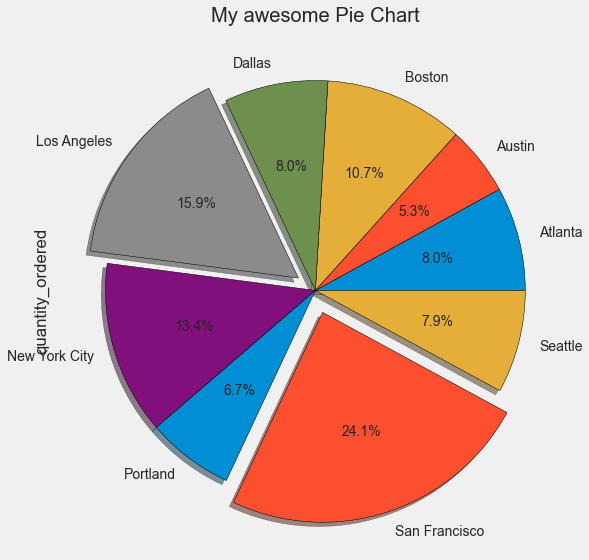

In [88]:
%matplotlib  inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
explode=[0,0,0,0,0.1,0,0,0.11,0]
City.plot(kind='pie',figsize=(14,8),fontsize=14,explode=explode,wedgeprops={"edgecolor":"black"},shadow=True,autopct= "%2.1f%%")
plt.title("My awesome Pie Chart")
plt.tight_layout()
plt.show()

In [89]:
sales.head(1)

,order_id,Product,quantity_ordered,price_each,order_date,purchase_address,Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas


In [90]:
sales['Sum'] = sales['quantity_ordered'] * sales['price_each']

In [91]:
sales.head(1)

,order_id,Product,quantity_ordered,price_each,order_date,purchase_address,Month,City,Sum
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas,23.9


In [92]:
sales[sales['Sum'] == 23.9].head(1)

,order_id,Product,quantity_ordered,price_each,order_date,purchase_address,Month,City,Sum
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas,23.9


In [93]:
Sum= sales.groupby('City').Sum.sum()

In [94]:
Sum

City
Atlanta          2.794199e+06
Austin           1.818044e+06
Boston           3.658628e+06
Dallas           2.765374e+06
Los Angeles      5.448304e+06
New York City    4.661867e+06
Portland         2.319332e+06
San Francisco    8.254744e+06
Seattle          2.745046e+06
Name: Sum, dtype: float64

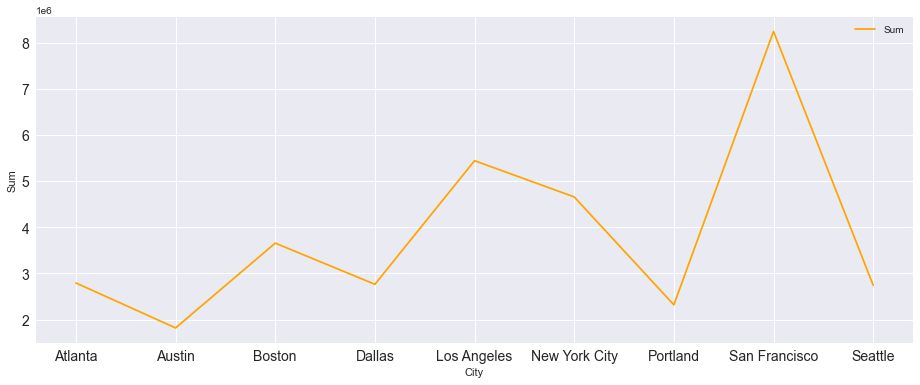

In [95]:
%matplotlib  inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
Sum.plot(kind='line',figsize=(14,6),fontsize=14,color='Orange')
plt.xlabel('City')
plt.ylabel('Sum')
plt.legend()
plt.show()

In [96]:
sales.head(1)

,order_id,Product,quantity_ordered,price_each,order_date,purchase_address,Month,City,Sum
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas,23.9


In [97]:
eleventh_month=sales[(sales['City'] == 'Dallas')& (sales['Month'] == 11) & (sales['quantity_ordered'] == 3)]

In [98]:
eleventh_month.Sum.value_counts()

8.97     11
11.52     8
35.97     1
44.85     1
Name: Sum, dtype: int64

In [99]:
eleventh_month.order_id.nunique()

21

In [100]:
month=eleventh_month.groupby('Product').quantity_ordered.sum()

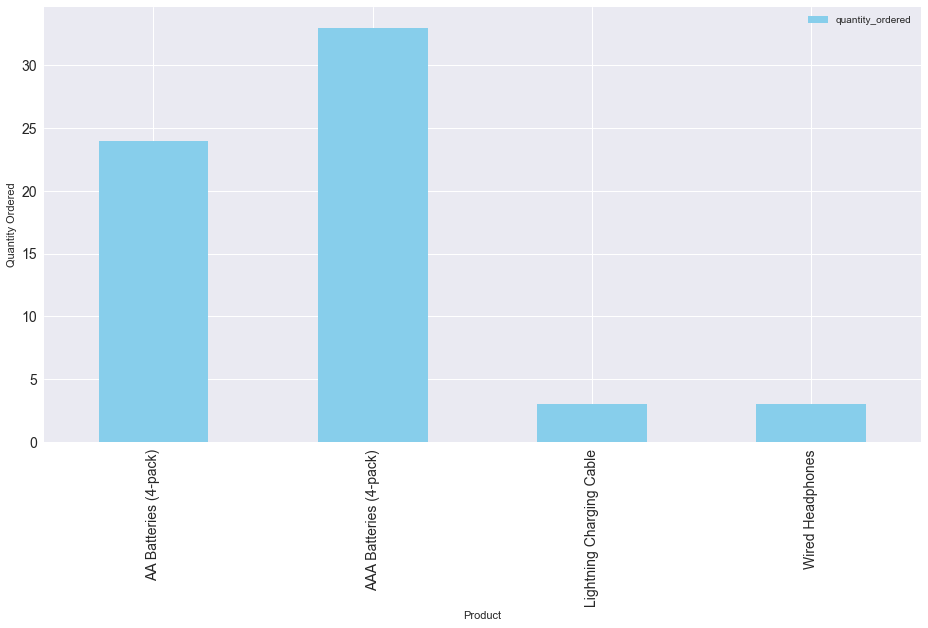

In [101]:
%matplotlib  inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
month.plot(kind='bar',figsize=(14,8),fontsize=14,color='SkyBlue')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.legend()
plt.show()

In [102]:
sales.head(1)

,order_id,Product,quantity_ordered,price_each,order_date,purchase_address,Month,City,Sum
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas,23.9


In [103]:
Sum_City=sales[(sales['price_each'] > 500) & (sales['Sum']  > 1000)& (sales['City'] == 'New York City')]

In [104]:
Sum_City

,order_id,Product,quantity_ordered,price_each,order_date,purchase_address,Month,City,Sum
588,177120,Macbook Pro Laptop,1,1700.0,2019-04-03 09:46:00,"371 Church St, New York City, NY 10001",4,New York City,1700.0
694,177217,Macbook Pro Laptop,1,1700.0,2019-04-15 16:13:00,"262 Willow St, New York City, NY 10001",4,New York City,1700.0
962,177473,Macbook Pro Laptop,1,1700.0,2019-04-02 18:24:00,"844 12th St, New York City, NY 10001",4,New York City,1700.0
1402,177890,Macbook Pro Laptop,1,1700.0,2019-04-08 15:47:00,"486 Park St, New York City, NY 10001",4,New York City,1700.0
1696,178168,Macbook Pro Laptop,1,1700.0,2019-04-21 14:48:00,"583 Washington St, New York City, NY 10001",4,New York City,1700.0
...,...,...,...,...,...,...,...,...,...
186149,258694,Macbook Pro Laptop,1,1700.0,2019-09-18 17:44:00,"684 Meadow St, New York City, NY 10001",9,New York City,1700.0
186406,258938,Macbook Pro Laptop,1,1700.0,2019-09-04 13:06:00,"155 Madison St, New York City, NY 10001",9,New York City,1700.0
186416,258948,Macbook Pro Laptop,1,1700.0,2019-09-12 09:19:00,"440 South St, New York City, NY 10001",9,New York City,1700.0
186493,259021,Macbook Pro Laptop,1,1700.0,2019-09-23 18:58:00,"427 Willow St, New York City, NY 10001",9,New York City,1700.0


In [105]:
Sum_City.Product.value_counts()

Macbook Pro Laptop    656
ThinkPad Laptop         1
Name: Product, dtype: int64

In [106]:
sales.head(1)

,order_id,Product,quantity_ordered,price_each,order_date,purchase_address,Month,City,Sum
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas,23.9


In [107]:
sales.City.value_counts()

San Francisco    44662
Los Angeles      29564
New York City    24847
Boston           19901
Atlanta          14863
Dallas           14797
Seattle          14713
Portland         12449
Austin            9890
Name: City, dtype: int64

In [108]:
sales[(sales['City'] == 'Austin') & (sales['Month'] == 9) &(sales['Product'] == 'iPhone')]

,order_id,Product,quantity_ordered,price_each,order_date,purchase_address,Month,City,Sum
175189,248175,iPhone,1,700.0,2019-09-08 13:58:00,"736 4th St, Austin, TX 73301",9,Austin,700.0
175327,248310,iPhone,1,700.0,2019-09-05 21:00:00,"201 Spruce St, Austin, TX 73301",9,Austin,700.0
175497,248471,iPhone,1,700.0,2019-09-20 14:55:00,"763 Johnson St, Austin, TX 73301",9,Austin,700.0
175927,248888,iPhone,1,700.0,2019-09-14 16:40:00,"286 Cedar St, Austin, TX 73301",9,Austin,700.0
176628,249555,iPhone,1,700.0,2019-09-17 14:33:00,"376 5th St, Austin, TX 73301",9,Austin,700.0
176961,249872,iPhone,1,700.0,2019-09-20 22:23:00,"98 Park St, Austin, TX 73301",9,Austin,700.0
177115,250018,iPhone,1,700.0,2019-09-14 12:16:00,"516 Church St, Austin, TX 73301",9,Austin,700.0
177744,250625,iPhone,1,700.0,2019-09-11 20:18:00,"225 Forest St, Austin, TX 73301",9,Austin,700.0
178073,250939,iPhone,1,700.0,2019-09-24 20:17:00,"645 Meadow St, Austin, TX 73301",9,Austin,700.0
178624,251472,iPhone,1,700.0,2019-09-15 13:54:00,"853 Madison St, Austin, TX 73301",9,Austin,700.0


In [109]:
sales.head(1)

,order_id,Product,quantity_ordered,price_each,order_date,purchase_address,Month,City,Sum
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas,23.9


In [110]:
sales['Day'] = sales['order_date'].dt.day

In [111]:
sales.head(1)

,order_id,Product,quantity_ordered,price_each,order_date,purchase_address,Month,City,Sum,Day
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas,23.9,19


In [112]:
print(sales['Day'].dtype)

int64


In [116]:
sales[(sales['Day'] == 16 )& (sales['Month']== 1) &(sales['City'] == 'Boston') ]

,order_id,Product,quantity_ordered,price_each,order_date,purchase_address,Month,City,Sum,Day
67739,141422,Apple Airpods Headphones,1,150.00,2019-01-16 22:23:00,"970 Lakeview St, Boston, MA 02215",1,Boston,150.00,16
67986,141662,AAA Batteries (4-pack),1,2.99,2019-01-16 13:06:00,"106 Jefferson St, Boston, MA 02215",1,Boston,2.99,16
67990,141666,AA Batteries (4-pack),2,3.84,2019-01-16 16:22:00,"956 Adams St, Boston, MA 02215",1,Boston,7.68,16
68290,141951,ThinkPad Laptop,1,999.99,2019-01-16 06:54:00,"489 12th St, Boston, MA 02215",1,Boston,999.99,16
68543,142185,Bose SoundSport Headphones,1,99.99,2019-01-16 14:02:00,"208 West St, Boston, MA 02215",1,Boston,99.99,16
68684,142317,Flatscreen TV,1,300.00,2019-01-16 11:01:00,"885 9th St, Boston, MA 02215",1,Boston,300.00,16
69184,142792,34in Ultrawide Monitor,1,379.99,2019-01-16 08:31:00,"387 Maple St, Boston, MA 02215",1,Boston,379.99,16
69214,142821,USB-C Charging Cable,2,11.95,2019-01-16 20:53:00,"37 West St, Boston, MA 02215",1,Boston,23.90,16
69251,142854,USB-C Charging Cable,1,11.95,2019-01-16 13:27:00,"328 Lakeview St, Boston, MA 02215",1,Boston,11.95,16
69477,143066,USB-C Charging Cable,1,11.95,2019-01-16 23:13:00,"855 2nd St, Boston, MA 02215",1,Boston,11.95,16


In [117]:
sales.head(1)

,order_id,Product,quantity_ordered,price_each,order_date,purchase_address,Month,City,Sum,Day
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas,23.9,19


In [118]:
sales['Time']=sales['order_date'].dt.hour 

In [119]:
sales.head(1)

,order_id,Product,quantity_ordered,price_each,order_date,purchase_address,Month,City,Sum,Day,Time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas,23.9,19,8


In [120]:
sales[(sales['Time'] == 9) &(sales['Day'] == 20)]

,order_id,Product,quantity_ordered,price_each,order_date,purchase_address,Month,City,Sum,Day,Time
1160,177660,27in 4K Gaming Monitor,1,389.99,2019-04-20 09:40:00,"951 River St, San Francisco, CA 94016",4,San Francisco,389.99,20,9
1353,177843,Vareebadd Phone,1,400.00,2019-04-20 09:42:00,"14 5th St, Los Angeles, CA 90001",4,Los Angeles,400.00,20,9
2000,178462,Flatscreen TV,1,300.00,2019-04-20 09:47:00,"553 Hickory St, San Francisco, CA 94016",4,San Francisco,300.00,20,9
2720,179163,AAA Batteries (4-pack),1,2.99,2019-04-20 09:33:00,"669 Maple St, New York City, NY 10001",4,New York City,2.99,20,9
3410,179826,AAA Batteries (4-pack),1,2.99,2019-04-20 09:06:00,"922 10th St, Boston, MA 02215",4,Boston,2.99,20,9
...,...,...,...,...,...,...,...,...,...,...,...
184247,256867,Lightning Charging Cable,1,14.95,2019-09-20 09:38:00,"787 Sunset St, Dallas, TX 75001",9,Dallas,14.95,20,9
184248,256867,ThinkPad Laptop,1,999.99,2019-09-20 09:38:00,"787 Sunset St, Dallas, TX 75001",9,Dallas,999.99,20,9
184424,257037,Lightning Charging Cable,1,14.95,2019-09-20 09:45:00,"929 12th St, Dallas, TX 75001",9,Dallas,14.95,20,9
185476,258044,AA Batteries (4-pack),1,3.84,2019-09-20 09:59:00,"640 Forest St, New York City, NY 10001",9,New York City,3.84,20,9
